In [236]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

**1.** Resuelva la siguiente integral definida con el primer método de integración por Montecarlo usando 100, 1000, 10000, 100000, 1000000 y 10000000 puntos. Compárelo con su valor real=1.
$$
\int_1^e\frac{1}{x}dx
$$

**Solución**

In [237]:
def f(x):
    return 1/x

In [238]:
def montecarlo1(f,a,b,N):
    u=np.random.uniform(a,b,N) 
    y=f(u) 
    return np.mean(y)*(b-a) 

In [239]:
N=np.logspace(2,7,6).astype('int')
N

array([     100,     1000,    10000,   100000,  1000000, 10000000])

In [240]:
b=np.exp(1)

In [241]:
tabla1=pd.DataFrame(index=N,columns=['Integral'])
for n in N:
    tabla1.loc[n]=montecarlo1(f,1,b,n)
tabla1['Error abs']=np.abs(tabla['Integral']-1)
tabla1['Error rel']=1/np.sqrt(N)
tabla1

,Integral,Error abs,Error rel
100,1.010777,0.009818,0.100000
1000,1.000166,0.005924,0.031623
10000,0.999739,0.000542,0.010000
100000,0.999947,0.000908,0.003162
1000000,1.000102,0.0004,0.001000
10000000,1.000104,0.000066,0.000316


**2.** Encuentre el volumen de una copa descrita como sigue:

In [242]:
def copa(th,r,z):
    C1 = (z>0)*(r>=0.9*z)*(r<=1.1*z)*(z<=1)
    C2 = (z<=-1.5)*(r<0.5)*(z>=-1.6)
    C3 = (r<0.1)*(z<=0)*(z>-1.5)
    return C1 | C2 | C3

Use límites para $-1.6\leq z\leq 1$, $0\leq r \leq 2$ y $-\pi\leq\theta\leq\pi$. Con puntos desde $10^2$ hasta $10^7$, mostrando en una tabla la acotación del error relativo a priori.

In [243]:
def copaE(th,z):
    C1 = (z>0)*(1.1*z)*(z<=1)
    C2 = (z<=-1.5)*(0.5)*(z>=-1.6)
    C3 = 0.1*(z<=0)*(z>-1.5)
    return C1+C2+C3

C:\Users\maria\AppData\Local\Temp\ipykernel_39752\2482010057.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


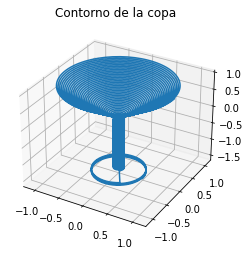

In [244]:
th=np.linspace(-np.pi*1000000,1000000*np.pi,10000)
z=np.linspace(-1.6,1,10000)

r1=copaE(th,z)

x1=r1*np.cos(th)
y1=r1*np.sin(th)

fig = plt.figure()
ax=fig.gca(projection='3d')
plt.title('Contorno de la copa')
ax.plot(x1,y1,z)

**Solución**

In [245]:
def bernoulli(th,r,z):
    return copa(th,r,z)

In [246]:
def montecarlo2(bernoulli,minth,maxth,minr,maxr,minz,maxz,N):
    uth=np.random.uniform(minth,maxth,N)
    ur=np.random.uniform(minr,maxr,N)
    uz=np.random.uniform(minz,maxz,N)
    B=bernoulli(uth,ur,uz)
    Vcil=np.pi*(maxz-minz)*(maxr-minr)**2 # Volumen del cilindro
    return Vcil*np.mean(B) # Volumen de la copa

In [247]:
N=np.logspace(2,7,6).astype('int')
N

array([     100,     1000,    10000,   100000,  1000000, 10000000])

In [248]:
th=np.random.uniform(-np.pi,np.pi,N[-1])
r=np.random.uniform(0,2,N[-1])
z=np.random.uniform(-1.6,1,N[-1])
B=bernoulli(th,r,z)
p=np.mean(B)
Erel=(1/np.sqrt(N))*(np.sqrt((1-p)/p))

In [249]:
tabla2=pd.DataFrame(index=N,columns=['Volumen de copa','Volumen del cilindro'])
for n in N:
    tabla2.loc[n,'Volumen de copa']=montecarlo2(bernoulli,-np.pi,np.pi,0,2,-1.6,1,n)
    tabla2.loc[n,'Volumen del cilindro']=np.pi*2.6*2**2
tabla2['Error rel']=Erel
tabla2

,Volumen de copa,Volumen del cilindro,Error rel
100,1.960354,32.672564,0.404214
1000,1.993026,32.672564,0.127824
10000,1.901543,32.672564,0.040421
100000,1.864623,32.672564,0.012782
1000000,1.873118,32.672564,0.004042
10000000,1.883407,32.672564,0.001278


**3.** Dada la función
$$
\frac{dy}{dx}=e^{-x^2+1}\cos(13x)+3
$$

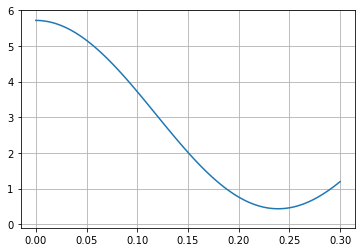

In [250]:
x=np.linspace(0,0.3,100)
dy=np.exp(-x**2+1)*np.cos(13*x)+3
plt.plot(x,dy)
plt.ylim([-0.1,6])
plt.grid()

**3.1** Encuentre $y(0.1)$ con el primer método de integración por Montecarlo conociendo $y(0)=1$. Use $10^7$ puntos.

**Solución**

In [251]:
def f(x):
    return np.exp(-x**2+1)*np.cos(13*x)+3

In [252]:
def Montecarlo1(f,a,b,N):
    u=np.random.uniform(a,b,N) 
    y=f(u)
    return np.mean(y)*(b-a)

In [253]:
Montecarlo1(f,0,0.1,10**7)

0.5009718715601535

In [254]:
y0=1

In [255]:
y1=Montecarlo1(f,0,0.1,10**7)+y0
y1 # y(0.1)

1.500979754534248

**3.2** Encuentre de igual forma $y(0.2)$ de dos formas, una conociendo $y(0)$ y otra conociendo $y(0.1)$, finalmente compare las integrales en una tabla usando desde $10^2$ hasta $10^7$ puntos.

**Solución**

In [256]:
Montecarlo1(f,0,0.2,10**2) # Conociendo y(0)

0.7772416277925286

In [257]:
y2=Montecarlo1(f,0,0.2,10**2)+y0
y2 # y(0.2) conociendo y(0)

1.6885828963719716

In [258]:
Montecarlo1(f,0.1,0.2,10**2) # Conociendo y(0.1)

0.22015074800931633

In [259]:
y3=Montecarlo1(f,0.1,0.2,10**2)+y1
y3 # y(0.2) conociendo y(0.1)

1.708210067508503

In [260]:
N=np.logspace(2,7,6).astype('int')
N

array([     100,     1000,    10000,   100000,  1000000, 10000000])

In [261]:
tabla3=pd.DataFrame(index=N,columns=['y(0.2) conociendo y(0)','y(0.2) conociendo y(0.1)'])
for n in N:
    tabla3.loc[n,'y(0.2) conociendo y(0)']=Montecarlo1(f,0,0.2,n)+y0
    tabla3.loc[n,'y(0.2) conociendo y(0.1)']=Montecarlo1(f,0.1,0.2,n)+y1
tabla3

,y(0.2) conociendo y(0),y(0.2) conociendo y(0.1)
100,1.703975,1.699717
1000,1.712991,1.714611
10000,1.708348,1.71118
100000,1.709991,1.710316
1000000,1.710068,1.710197
10000000,1.710227,1.710272
